In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)

In [2]:
# Load dataset
df = pd.read_csv("C:/Users/deths/Downloads/loan_approval_dataset.csv")

In [3]:
# Explore the dataset
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
print("Dataset Shape: ", df.shape)

Dataset Shape:  (4269, 13)


In [6]:
print("Dataset length: ", len(df))

Dataset length:  4269


In [ ]:
# Cleaning the dataset of spaces and unaccepted datatypes
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

le_dict = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le

In [18]:
# Drop the Independent Variables (X) and Separate the Dependent Variable (y)
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

In [19]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
#Train Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
# Make Predictions
y_pred = dt_model.predict(X_test)

In [22]:
# Evaluate Model
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

Accuracy: 0.98


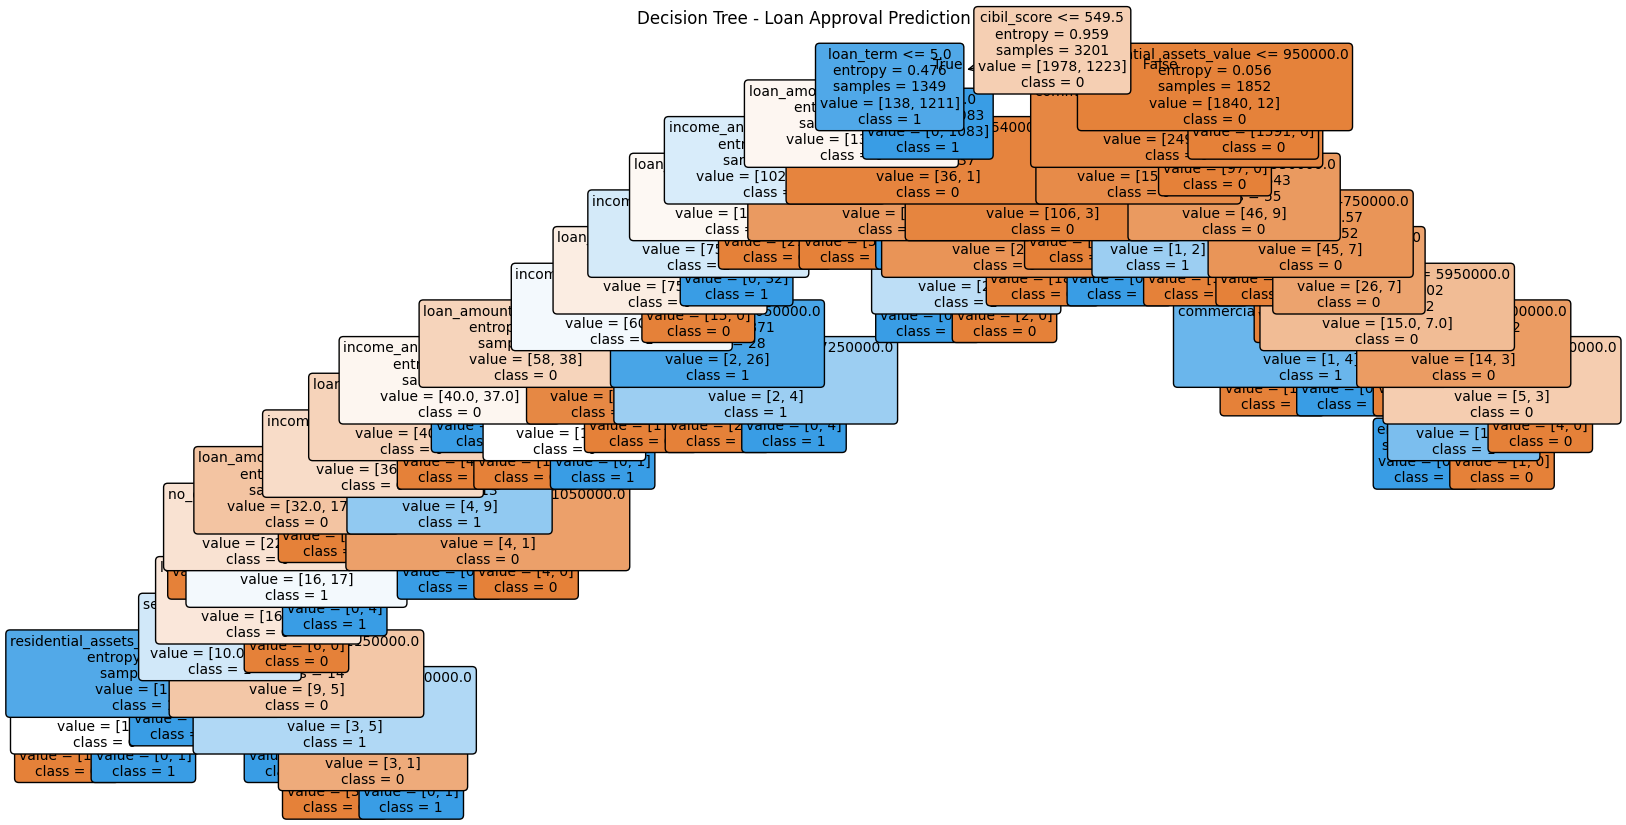

In [23]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=[str(c) for c in np.unique(y)],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree - Loan Approval Prediction")
plt.show()

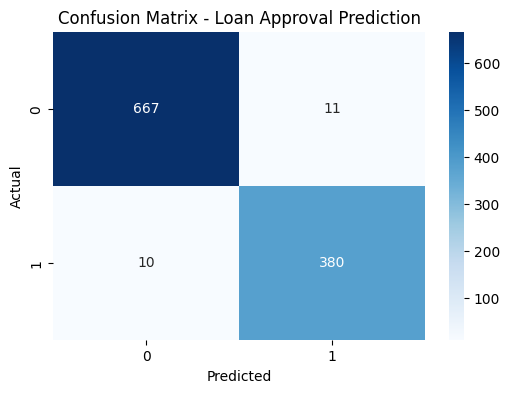

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Loan Approval Prediction")
plt.show()

In [25]:

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       678
           1       0.97      0.97      0.97       390

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



In [26]:
# Cross Validation
cv_scores = cross_val_score(dt_model, X, y, cv=5)
print("\n🔁 Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", round(cv_scores.mean(), 3))


🔁 Cross-Validation Scores: [0.97775176 0.98009368 0.98126464 0.9824356  0.98124267]
Mean CV Accuracy: 0.981


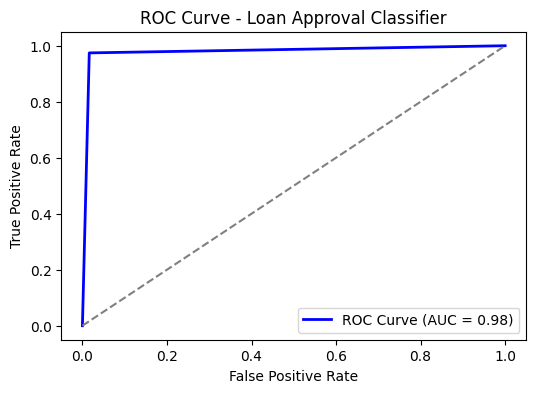

In [27]:
# ROC Curve (For Binary Classification)
if len(np.unique(y)) == 2:
    y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title("ROC Curve - Loan Approval Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

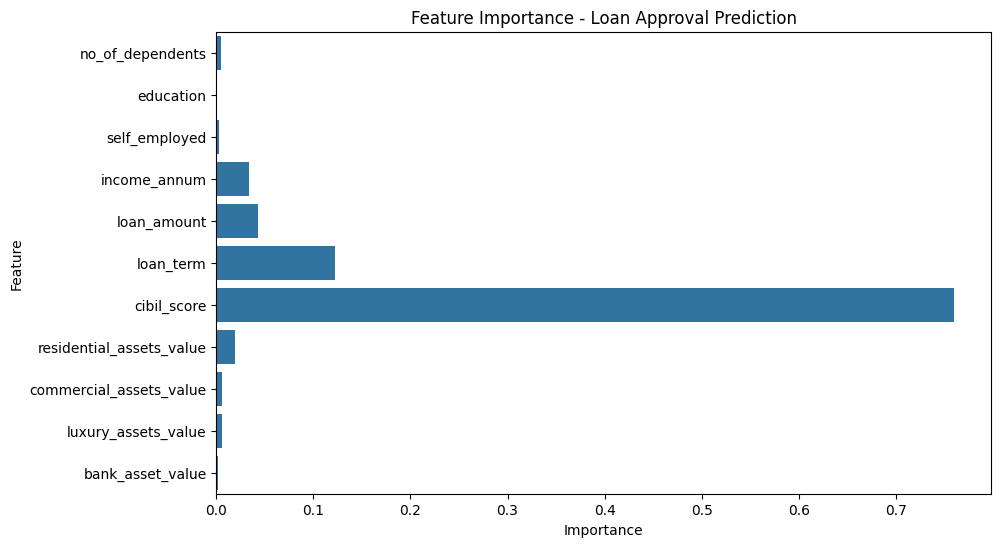

In [28]:
plt.figure(figsize=(10,6))
importances = dt_model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance - Loan Approval Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()